<a href="https://colab.research.google.com/github/gustavougarte1/DataScience/blob/main/Trabalho%20pratico%20modulo%202.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Carregar os arquivos CSV com codificação 'latin1'
dados_caracteristicas_fisicas = pd.read_csv('/content/dados_caracteristicas_fisicas.csv', encoding='latin1')
dados_pessoais = pd.read_csv('/content/dados_pessoais.csv', encoding='latin1', sep=';')
estado_regiao = pd.read_csv('/content/estado_regiao.csv', encoding='latin1', sep=';')

In [4]:
# Renomear colunas para facilitar a manipulação
dados_pessoais.columns = ['ID_Cliente', 'Escolaridade', 'Tem_Filhos', 'Salario', 'Idade', 'Estado_Civil', 'Profissao', 'Numero_Cartoes_Credito', 'Cod_Estado']
estado_regiao.columns = ['ID_Estado', 'Sigla', 'Estado', 'Regiao', 'Pais']

In [6]:
# Convertendo a coluna ID_Cliente para int em dados_pessoais
dados_pessoais['ID_Cliente'] = pd.to_numeric(dados_pessoais['ID_Cliente'], errors='coerce')
dados_pessoais = dados_pessoais.dropna(subset=['ID_Cliente'])
dados_pessoais['ID_Cliente'] = dados_pessoais['ID_Cliente'].astype(int)

# Convertendo a coluna 'ID Cliente' para int em dados_caracteristicas_fisicas
dados_caracteristicas_fisicas['ID Cliente'] = dados_caracteristicas_fisicas['ID Cliente'].astype(int)

In [7]:
# Realizando o inner join entre dados_pessoais e dados_caracteristicas_fisicas
dados_combinados = pd.merge(dados_pessoais, dados_caracteristicas_fisicas, left_on='ID_Cliente', right_on='ID Cliente')

# Realizando o inner join com estado_regiao
dados_completos = pd.merge(dados_combinados, estado_regiao, left_on='Cod_Estado', right_on='ID_Estado')

In [9]:
# Análise descritiva das variáveis de interesse
analise_descritiva = dados_completos[['Idade', 'Salario', 'Numero_Cartoes_Credito']].describe()



In [10]:
# Distribuição geográfica dos clientes por estado e região
distribuicao_geografica = dados_completos.groupby(['Estado', 'Regiao']).size().reset_index(name='Contagem_Clientes')

# Criando faixas etárias
faixas_etarias = pd.cut(dados_completos['Idade'], bins=[0, 18, 30, 40, 50, 60, 70, 80, 90, 100], labels=['0-18', '19-30', '31-40', '41-50', '51-60', '61-70', '71-80', '81-90', '91-100'])
dados_completos['Faixa_Etaria'] = faixas_etarias

# Segmentação por faixa etária, nível de escolaridade e estado civil
segmentos_clientes = dados_completos.groupby(['Faixa_Etaria', 'Escolaridade', 'Estado_Civil']).size().reset_index(name='Contagem_Clientes')

# Distribuição geográfica dos segmentos de clientes
distribuicao_segmentos_geografica = dados_completos.groupby(['Faixa_Etaria', 'Escolaridade', 'Estado_Civil', 'Regiao']).size().reset_index(name='Contagem_Clientes')

# Tratando os dados ausentes na coluna Idade e Salário
dados_pessoais['Idade'].fillna(dados_pessoais['Idade'].mean(), inplace=True)
dados_pessoais['Salario'].fillna(dados_pessoais['Salario'].mean(), inplace=True)

# Combinando novamente os dados após o tratamento
dados_combinados = pd.merge(dados_pessoais, dados_caracteristicas_fisicas, left_on='ID_Cliente', right_on='ID Cliente')
dados_completos = pd.merge(dados_combinados, estado_regiao, left_on='Cod_Estado', right_on='ID_Estado')


In [11]:
# Filtrando os dados para a região Sul
dados_regiao_sul = dados_completos[dados_completos['Regiao'] == 'Sul']

# Calculando o desvio padrão das idades na região Sul
desvio_padrao_idade_sul = dados_regiao_sul['Idade'].std()
print(f"Desvio padrão das idades na região Sul: {desvio_padrao_idade_sul}")

Desvio padrão das idades na região Sul: 18.05929615985863


In [12]:
# Calculando a média salarial por região
media_salarial_regiao = dados_completos.groupby('Regiao')['Salario'].mean().reset_index()

# Encontrando a região com a menor média salarial
regiao_menor_media_salarial = media_salarial_regiao.loc[media_salarial_regiao['Salario'].idxmin()]
print(f"Região com a menor média salarial: {regiao_menor_media_salarial['Regiao']}")

Região com a menor média salarial: Nordeste


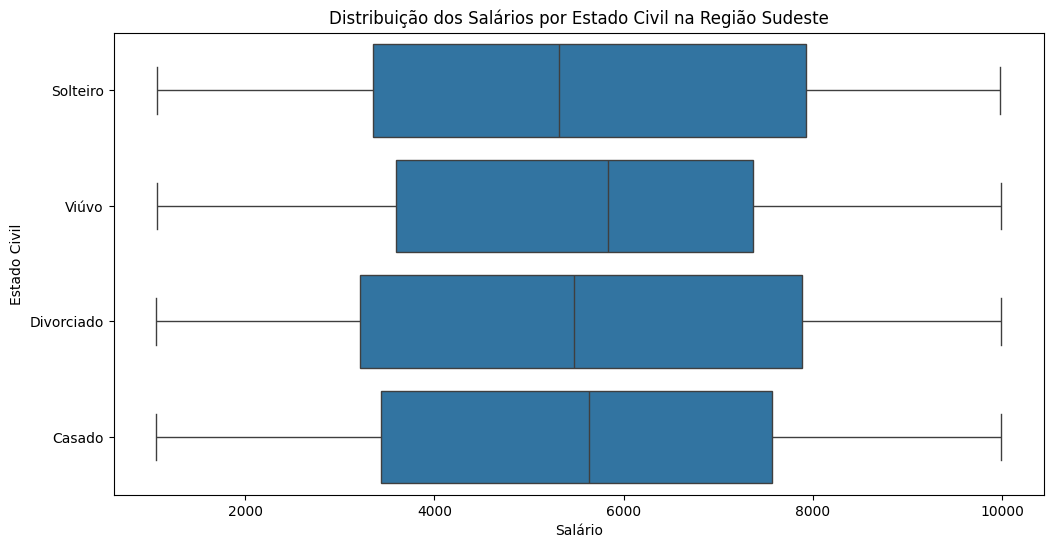

In [13]:
# Boxplot da distribuição dos salários por estado civil na região Sudeste
dados_sudeste = dados_completos[dados_completos['Regiao'] == 'Sudeste']
plt.figure(figsize=(12, 6))
sns.boxplot(y='Estado_Civil', x='Salario', data=dados_sudeste)
plt.title('Distribuição dos Salários por Estado Civil na Região Sudeste')
plt.ylabel('Estado Civil')
plt.xlabel('Salário')
plt.show()

In [14]:
# Média de pesos das pessoas que são do estado de São Paulo e que possuem filhos
dados_sp_com_filhos = dados_completos[(dados_completos['Estado'] == 'São Paulo') & (dados_completos['Tem_Filhos'] == 'Sim')]
media_peso_sp_com_filhos = dados_sp_com_filhos['Peso (kg)'].mean()
print(f"Média de pesos das pessoas de SP com filhos: {media_peso_sp_com_filhos}")

Média de pesos das pessoas de SP com filhos: 78.61545454545455


In [15]:
# Região com mais pessoas com escolaridade nível superior
dados_superior = dados_completos[dados_completos['Escolaridade'] == 'Superior']
contagem_superior_regiao = dados_superior['Regiao'].value_counts()
regiao_mais_superior = contagem_superior_regiao.idxmax()
print(f"Região com mais pessoas com nível superior: {regiao_mais_superior}")

Região com mais pessoas com nível superior: Nordeste


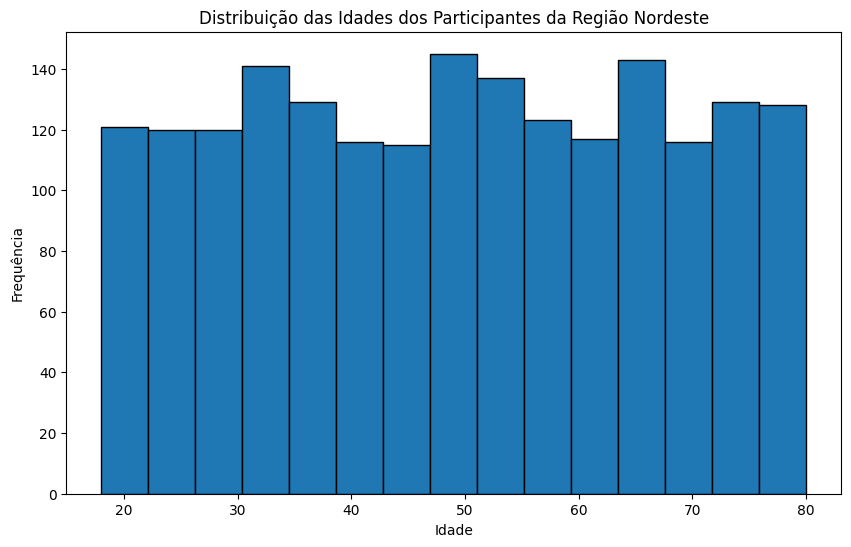

In [16]:
# Histograma da distribuição das idades dos participantes da região Nordeste
dados_nordeste = dados_completos[dados_completos['Regiao'] == 'Nordeste']
plt.figure(figsize=(10, 6))
plt.hist(dados_nordeste['Idade'], bins=15, edgecolor='black')
plt.title('Distribuição das Idades dos Participantes da Região Nordeste')
plt.xlabel('Idade')
plt.ylabel('Frequência')
plt.show()

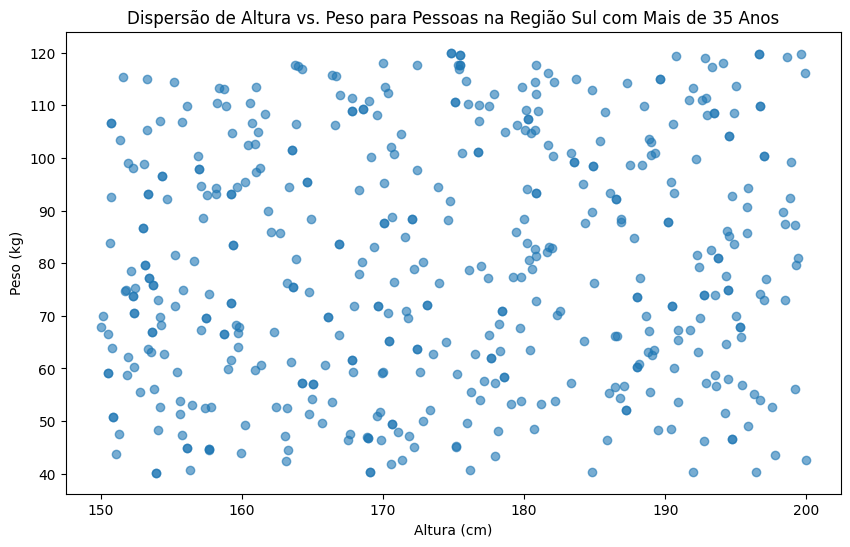

In [17]:
# Gráfico de dispersão de altura vs. peso para pessoas na região Sul com mais de 35 anos
dados_sul_acima_35 = dados_completos[(dados_completos['Regiao'] == 'Sul') & (dados_completos['Idade'] > 35)]
plt.figure(figsize=(10, 6))
plt.scatter(dados_sul_acima_35['Altura (cm)'], dados_sul_acima_35['Peso (kg)'], alpha=0.6)
plt.title('Dispersão de Altura vs. Peso para Pessoas na Região Sul com Mais de 35 Anos')
plt.xlabel('Altura (cm)')
plt.ylabel('Peso (kg)')
plt.show()

In [18]:
# Estado com o maior número de pessoas
contagem_pessoas_estado = dados_completos['Estado'].value_counts()
estado_mais_pessoas = contagem_pessoas_estado.idxmax()
print(f"Estado com o maior número de pessoas: {estado_mais_pessoas}")

Estado com o maior número de pessoas: Rio Grande do Norte


In [19]:
# Estado com o menor número de professores entre as opções fornecidas
dados_professores = dados_completos[dados_completos['Profissao'] == 'Professor']
contagem_professores_estado = dados_professores['Estado'].value_counts()
estados_interesse_professores = ['Bahia', 'Amazonas', 'Minas Gerais', 'Rondônia']
contagem_estados_interesse_professores = contagem_professores_estado[estados_interesse_professores]
estado_menos_professores_interesse = contagem_estados_interesse_professores.idxmin()
print(f"Estado com o menor número de professores: {estado_menos_professores_interesse}")

Estado com o menor número de professores: Amazonas


In [20]:
# Escolaridade com a menor média salarial
media_salarial_escolaridade = dados_completos.groupby('Escolaridade')['Salario'].mean().reset_index()
escolaridade_menor_media_salarial = media_salarial_escolaridade.loc[media_salarial_escolaridade['Salario'].idxmin()]
print(f"Escolaridade com a menor média salarial: {escolaridade_menor_media_salarial['Escolaridade']}")

Escolaridade com a menor média salarial: Superior
